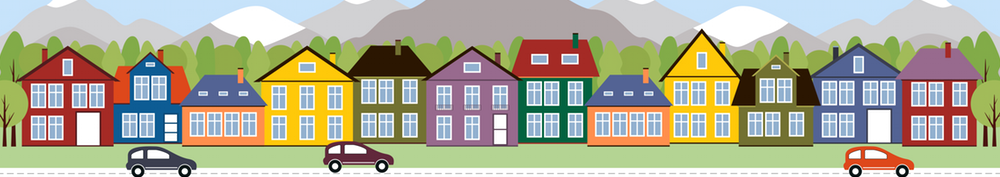

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Exploratory Data Analysis

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

scaler = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')
data = [df_train,df_test]
del df_train['Id']
print('train shape:',df_train.shape)
print('test shape:',df_test.shape)

train shape: (1460, 80)
test shape: (1459, 80)


In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#NaN values in train datset

for col in df_train.columns.values:
    if df_train[col].isnull().sum() / len(df_train) > 0.3:
        for df in data:
            del df[col]

In [8]:
categorical_data = []
numeric_data = []
for columns in df_train.columns.values:
    if df_train[columns].dtype == 'object':
        categorical_data.append(columns)
    else:
        numeric_data.append(columns)
del numeric_data[-1]

In [9]:
df_train.isna().sum()[df_train.isna().sum() != 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

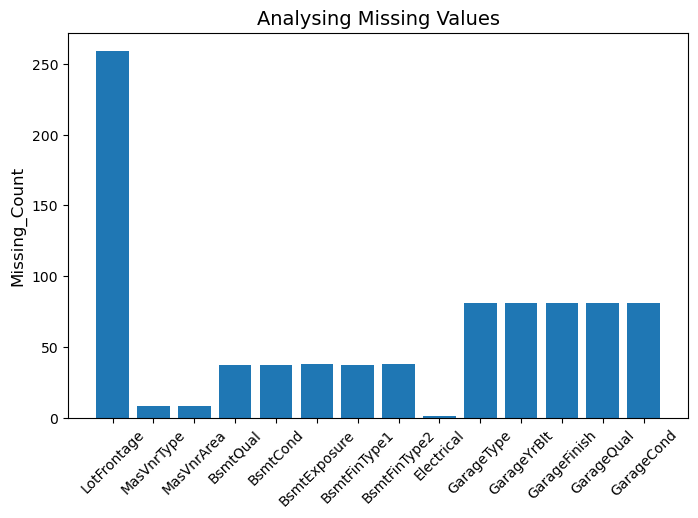

In [10]:
import matplotlib.pyplot as plt


null_values = df_train.isna().sum()[df_train.isna().sum() != 0]

plt.figure(figsize=(8, 5))
plt.bar(null_values.index,null_values.values)
plt.xticks(rotation=45)
plt.ylabel('Missing_Count', fontsize=12)
plt.title('Analysing Missing Values', fontsize=14)
plt.show()

In [11]:
len(df_train.columns)

75

# Analysing categorical columns

In [12]:
cat_df= df_train.select_dtypes(include=['object']).columns
cat_df= df_train[cat_df]
cat_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
cat_df= cat_df[['MSZoning','LotShape','Neighborhood','HouseStyle','MasVnrType',\
                'Foundation','GarageType','SaleType']]

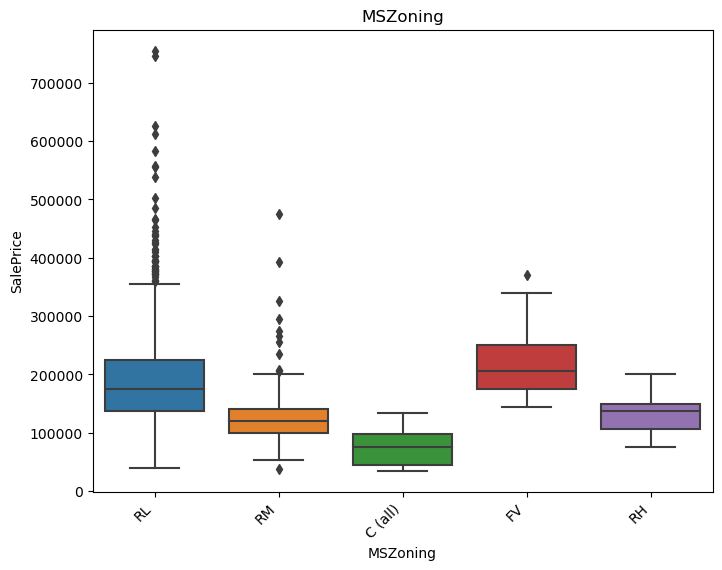

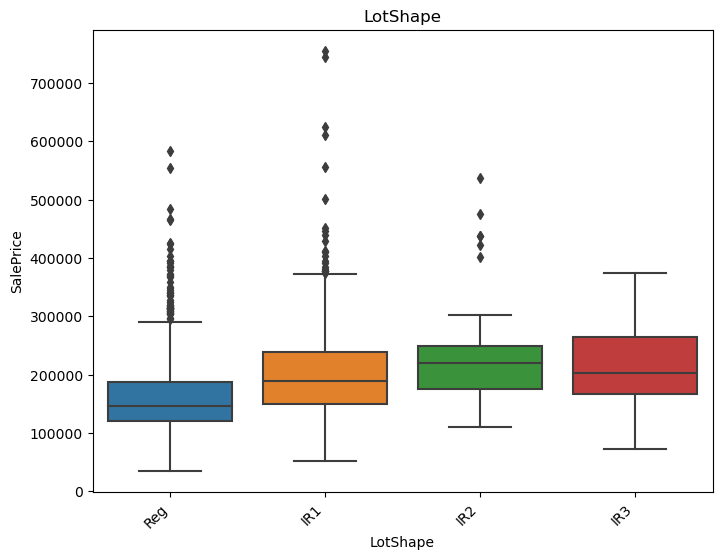

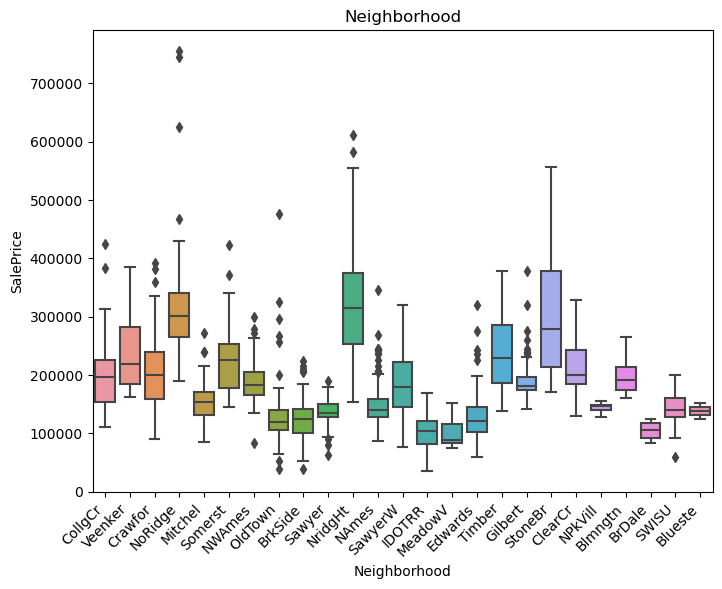

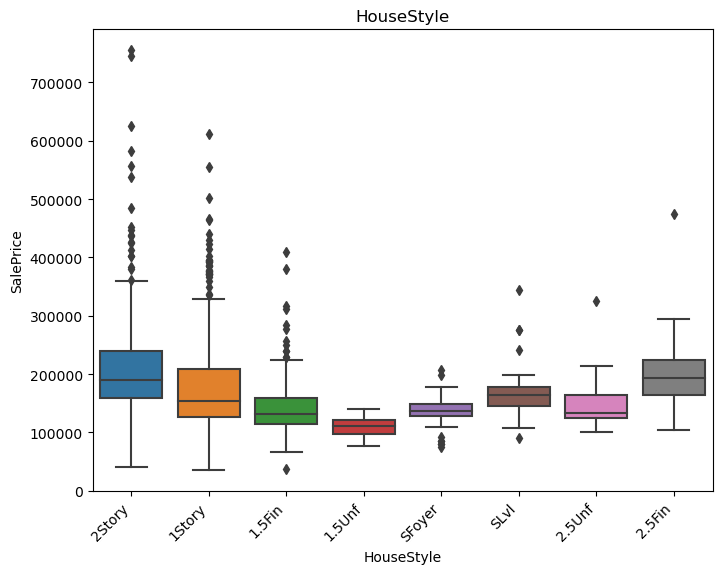

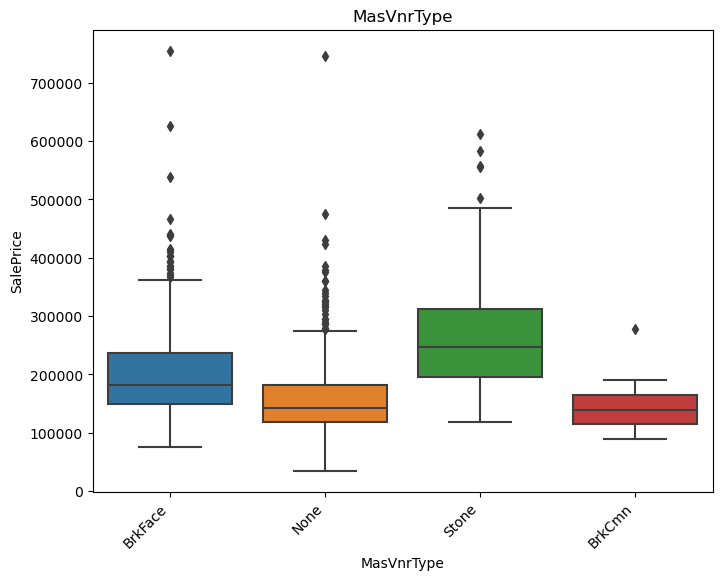

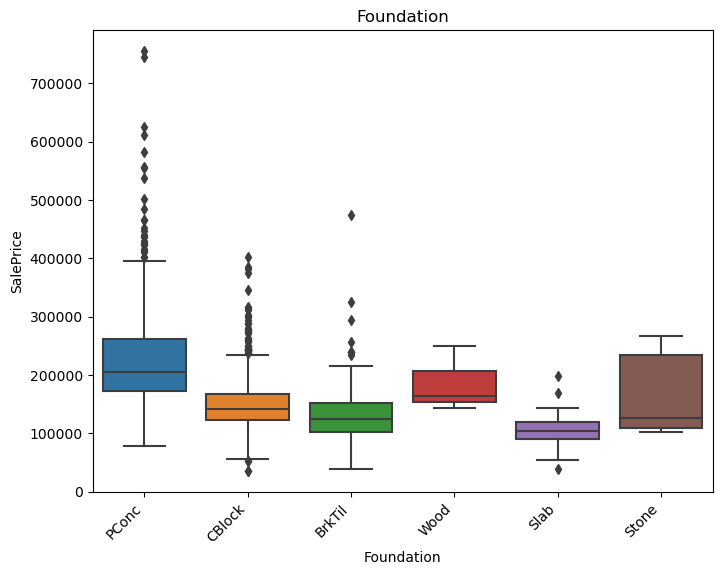

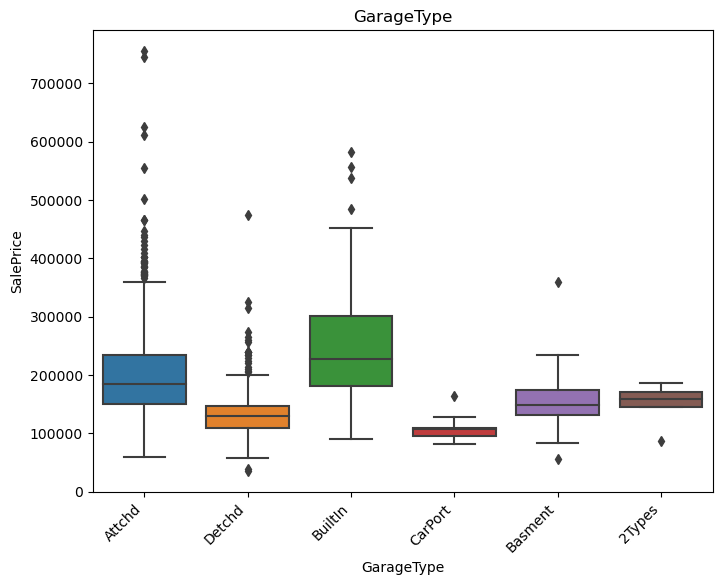

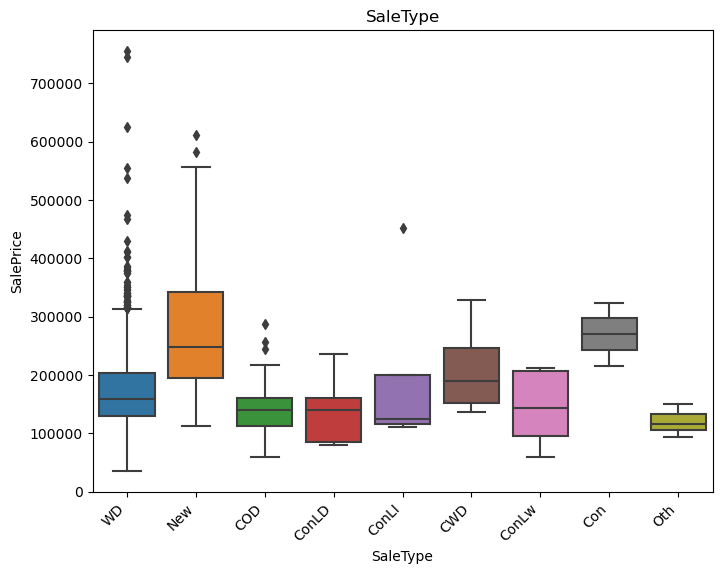

In [14]:

for col in cat_df:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col, y='SalePrice', data=df_train)
    plt.title(col)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Analysing Numerical Columns

In [15]:
correlation = pd.DataFrame(df_train[numeric_data].corr())
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


In [16]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(figsize=(16, 20))

<Figure size 1600x2000 with 0 Axes>

<Figure size 1600x2000 with 0 Axes>

<AxesSubplot:>

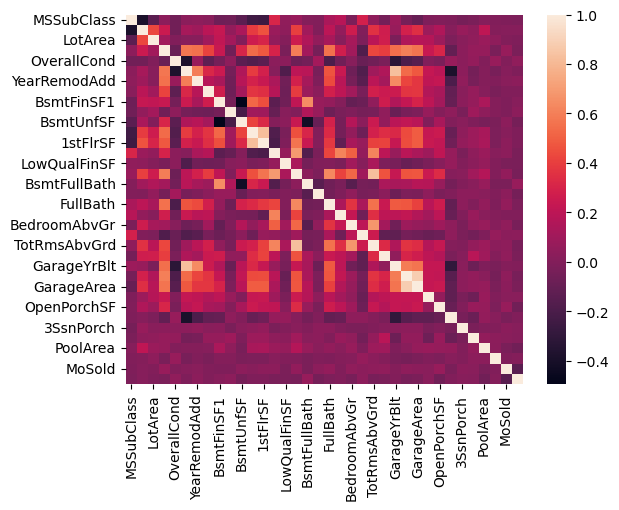

In [17]:
sns.heatmap(df_train[numeric_data].corr())

### Features that have high positive correlation with SalePrice:

In [18]:
def positive_corr():
    for i in correlation.columns[correlation.columns=='SalePrice']:
        print(i)
        print(correlation[(correlation[i] > 0.7) & (correlation[i]<1)][i])

In [19]:
positive_corr() 

Text(0, 0.5, 'SalePrice')

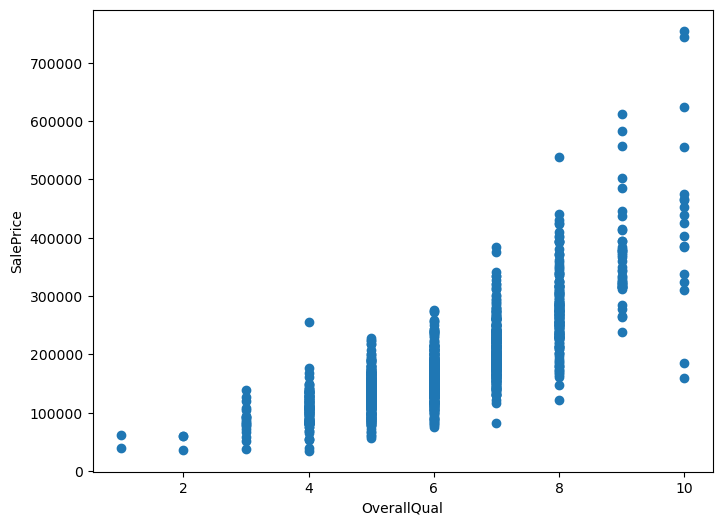

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x='OverallQual',y='SalePrice',data=df_train)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

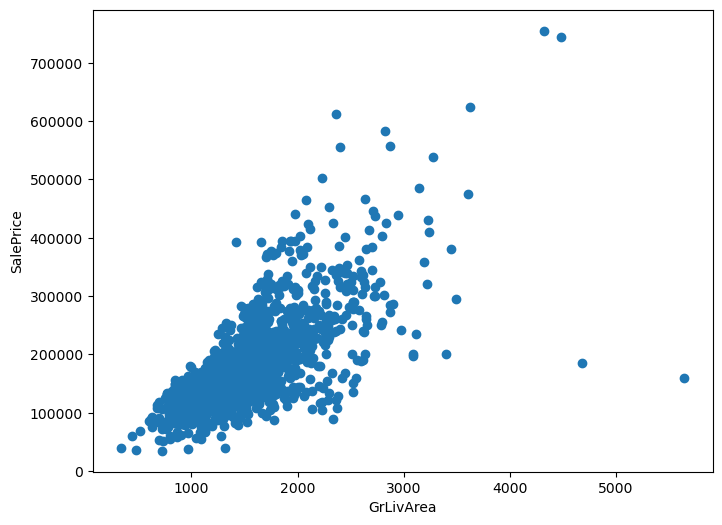

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x='GrLivArea',y='SalePrice',data=df_train)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### Features having high negative correlatioon with SalePrice:

In [22]:
def negative_corr():
    for i in correlation.columns[correlation.columns=='SalePrice']:
        print(i)
        print(correlation[(correlation[i] < -0.5)][i])

In [23]:
negative_corr()

There are no features that have a strong negative impact on SalePrice.

In [24]:
df_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

## Data pre-processing and feature engineering

In [25]:
#scaler for num_data and encoder for cat_df

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

scaler_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler())])

enc_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                          ('encoder', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [26]:
preprocess = ColumnTransformer(transformers=[
    ('num', scaler_pipeline, numeric_data),
    ('cat', enc_pipeline, categorical_data)
    ])


In [27]:
for df in data:
    df.fillna(method='ffill',inplace=True)

In [28]:
features = categorical_data+numeric_data
X_train , X_test , y_train , y_test = train_test_split(df_train[features],df_train['SalePrice'],test_size=0.3,random_state=39)



# Linear Regression

In [29]:
steps_lr=[('prep', preprocess), ('reg', LinearRegression())]
model_lr=Pipeline(steps_lr)
model_lr=model_lr.fit(X_train, y_train)
y_train_pred=model_lr.predict(X_train)
y_test_pred=model_lr.predict(X_test)


In [30]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (train): {:.2f}'.format(mse_train))
print('MSE (test): {:.2f}'.format(mse_test))
print('RMSE (train): {:.2f}'.format(rmse_train))
print('RMSE (test): {:.2f}'.format(rmse_test))
print('MAE (train): {:.2f}'.format(mae_train))
print('MAE (test): {:.2f}'.format(mae_test))
print('R-squared (train): {:.2f}'.format(r2_train))
print('R-squared (test): {:.2f}'.format(r2_test))

MSE (train): 497722395.77
MSE (test): 436966231108391126251339776.00
RMSE (train): 22309.69
RMSE (test): 20903737252185.10
MAE (train): 14209.07
MAE (test): 2361231149294.98
R-squared (train): 0.93
R-squared (test): -82726321347837152.00


# Lasso

In [31]:
avalues= list(np.logspace(-3,3,13))

In [32]:
mse_test=[]
mse_train=[]
for a in avalues:
    steps_las=[('prep', preprocess), ('rescale', MinMaxScaler()), ('la', Lasso(alpha=a,max_iter=100000))]
    model_las=Pipeline(steps_las)
    model_las=model_las.fit(X_train,y_train)
    y_train_pred=model_las.predict(X_train)
    y_test_pred=model_las.predict(X_test)
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.020e+10, tolerance: 6.894e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.892e+10, tolerance: 6.894e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.141e+08, toleranc

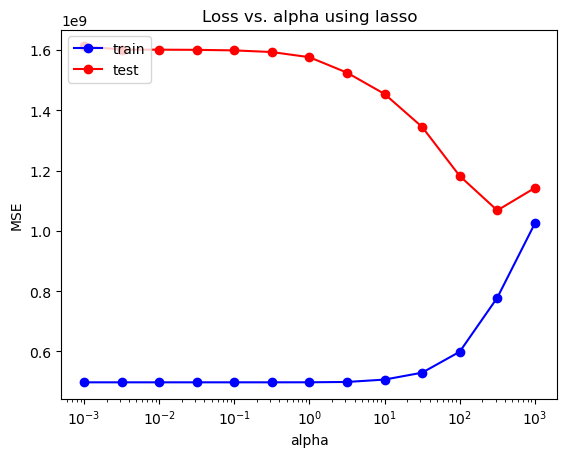

In [33]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(avalues, mse_train,label='train', marker='o', color='blue')
plt.plot(avalues, mse_test,label='test', marker='o', color='red')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Loss vs. alpha using lasso')
plt.legend(loc='upper left')


In [34]:
# we got best alpha of 10

steps_las=[('prep', preprocess), ('rescale', MinMaxScaler()), ('la', Lasso(alpha=10,max_iter=100000))]
model_las=Pipeline(steps_las)
model_las=model_las.fit(X_train,y_train)
y_train_pred=model_las.predict(X_train)
y_test_pred=model_las.predict(X_test)


In [35]:
print ("R2 score for Lasso Train :",r2_score(y_train, y_train_pred))
print ("R2 score for Lasso Test :",r2_score(y_test, y_test_pred))
    

R2 score for Lasso Train : 0.9248772711187847
R2 score for Lasso Test : 0.72465240207501


In [36]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (train): {:.2f}'.format(mse_train))
print('MSE (test): {:.2f}'.format(mse_test))
print('RMSE (train): {:.2f}'.format(rmse_train))
print('RMSE (test): {:.2f}'.format(rmse_test))
print('MAE (train): {:.2f}'.format(mae_train))
print('MAE (test): {:.2f}'.format(mae_test))
print('R-squared (train): {:.2f}'.format(r2_train))
print('R-squared (test): {:.2f}'.format(r2_test))

MSE (train): 506773991.35
MSE (test): 1454405322.87
RMSE (train): 22511.64
RMSE (test): 38136.67
MAE (train): 14326.05
MAE (test): 16351.19
R-squared (train): 0.92
R-squared (test): 0.72


# Ridge

In [37]:
mse_test=[]
mse_train=[]
for a in avalues:
    steps_rid=[('prep', preprocess), ('rescale', MinMaxScaler()), ('ri', Ridge(alpha=a,max_iter=100000))]
    model_rid=Pipeline(steps_rid)
    model_rid=model_rid.fit(X_train,y_train)
    y_train_pred=model_rid.predict(X_train)
    y_test_pred=model_rid.predict(X_test)
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_test,y_test_pred))




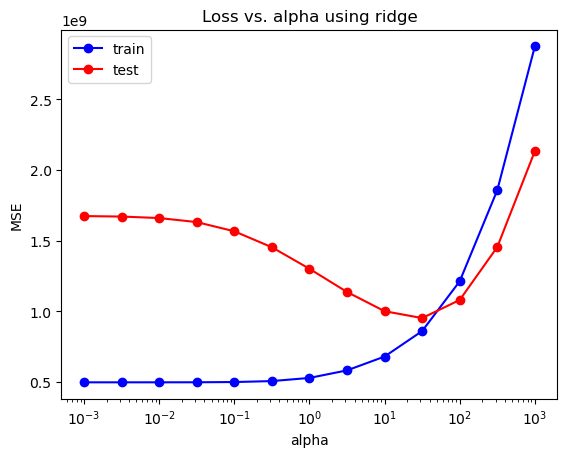

In [38]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(avalues, mse_train,label='train', marker='o', color='blue')
plt.plot(avalues, mse_test,label='test', marker='o', color='red')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Loss vs. alpha using ridge')
plt.legend(loc='upper left')

In [39]:
    steps_rid=[('prep', preprocess), ('rescale', MinMaxScaler()), ('ri', Ridge(alpha=0.1,max_iter=100000))]
    model_rid=Pipeline(steps_rid)
    model_rid=model_rid.fit(X_train,y_train)
    y_train_pred=model_rid.predict(X_train)
    y_test_pred=model_rid.predict(X_test)



In [40]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (train): {:.2f}'.format(mse_train))
print('MSE (test): {:.2f}'.format(mse_test))
print('RMSE (train): {:.2f}'.format(rmse_train))
print('RMSE (test): {:.2f}'.format(rmse_test))
print('MAE (train): {:.2f}'.format(mae_train))
print('MAE (test): {:.2f}'.format(mae_test))
print('R-squared (train): {:.2f}'.format(r2_train))
print('R-squared (test): {:.2f}'.format(r2_test))

MSE (train): 499725623.74
MSE (test): 1566733602.89
RMSE (train): 22354.54
RMSE (test): 39581.99
MAE (train): 14262.87
MAE (test): 16838.76
R-squared (train): 0.93
R-squared (test): 0.70


# RandomForestRegressor

In [41]:

steps_rf=[('prep', preprocess),('rescale', MinMaxScaler()), ('rf', RandomForestRegressor(random_state=10))]
model_rf = Pipeline(steps_rf)

In [42]:
parameters={"rf__max_depth" : [1,3,5,7,9],
           "rf__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "rf__min_samples_split":[5,10,15,20,25],
           "rf__max_features":["auto","log2","sqrt",None] }

In [43]:
tuning_model=GridSearchCV(model_rf,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=1)

In [44]:
tuning_model = tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


In [45]:
y_train_pred=tuning_model.predict(X_train)
y_test_pred=tuning_model.predict(X_test)

In [46]:
print(tuning_model.best_params_)

{'rf__max_depth': 9, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5}


In [47]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (train): {:.2f}'.format(mse_train))
print('MSE (test): {:.2f}'.format(mse_test))
print('RMSE (train): {:.2f}'.format(rmse_train))
print('RMSE (test): {:.2f}'.format(rmse_test))
print('MAE (train): {:.2f}'.format(mae_train))
print('MAE (test): {:.2f}'.format(mae_test))
print('R-squared (train): {:.2f}'.format(r2_train))
print('R-squared (test): {:.2f}'.format(r2_test))

MSE (train): 211787927.49
MSE (test): 797023795.88
RMSE (train): 14552.94
RMSE (test): 28231.61
MAE (train): 9376.98
MAE (test): 17573.50
R-squared (train): 0.97
R-squared (test): 0.85


# Decision Tree Regression

In [48]:
steps_dt=[('prep', preprocess),('rescale', MinMaxScaler()), ('dt', DecisionTreeRegressor(random_state=0))]
model_dt = Pipeline(steps_dt)

In [49]:
parameters_dt={"dt__max_depth" : [1,3,5,7,9,11,12],
           "dt__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "dt__min_samples_split":[5,10,15,20,25],
           "dt__max_features":["auto","log2","sqrt",None] }

In [50]:
tuning_model_dt=GridSearchCV(model_dt,param_grid=parameters_dt,scoring='neg_mean_squared_error',cv=3,verbose=1)

In [51]:
tuning_model_dt = tuning_model_dt.fit(X_train, y_train)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits


In [52]:
y_train_pred=tuning_model_dt.predict(X_train)
y_test_pred=tuning_model_dt.predict(X_test)

In [53]:
print(tuning_model_dt.best_params_)

{'dt__max_depth': 11, 'dt__max_features': 'auto', 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 5}


In [54]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (train): {:.2f}'.format(mse_train))
print('MSE (test): {:.2f}'.format(mse_test))
print('RMSE (train): {:.2f}'.format(rmse_train))
print('RMSE (test): {:.2f}'.format(rmse_test))
print('MAE (train): {:.2f}'.format(mae_train))
print('MAE (test): {:.2f}'.format(mae_test))
print('R-squared (train): {:.2f}'.format(r2_train))
print('R-squared (test): {:.2f}'.format(r2_test))

MSE (train): 472556085.91
MSE (test): 1407885277.93
RMSE (train): 21738.36
RMSE (test): 37521.80
MAE (train): 12630.58
MAE (test): 25402.47
R-squared (train): 0.93
R-squared (test): 0.73


# Gradient boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

In [56]:
steps_gbr=[('prep', preprocess), ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3))]


In [57]:
model = Pipeline(steps_gbr)
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                       

In [58]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [59]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (train): {:.2f}'.format(mse_train))
print('MSE (test): {:.2f}'.format(mse_test))
print('RMSE (train): {:.2f}'.format(rmse_train))
print('RMSE (test): {:.2f}'.format(rmse_test))
print('MAE (train): {:.2f}'.format(mae_train))
print('MAE (test): {:.2f}'.format(mae_test))
print('R-squared (train): {:.2f}'.format(r2_train))
print('R-squared (test): {:.2f}'.format(r2_test))

MSE (train): 169826619.86
MSE (test): 578075801.56
RMSE (train): 13031.75
RMSE (test): 24043.21
MAE (train): 9686.98
MAE (test): 15616.58
R-squared (train): 0.97
R-squared (test): 0.89


# Catboost

In [60]:
from catboost import CatBoostRegressor

In [61]:
model_cat = CatBoostRegressor(cat_features=categorical_data,verbose=500,iterations=10000,loss_function='RMSE',learning_rate=0.05,early_stopping_rounds=1000)
model_cat.fit(X_train,y_train)

0:	learn: 79529.9001026	total: 73.4ms	remaining: 12m 14s
500:	learn: 10731.0523346	total: 4.82s	remaining: 1m 31s
1000:	learn: 6568.5894988	total: 9.63s	remaining: 1m 26s
1500:	learn: 4336.9099871	total: 14.4s	remaining: 1m 21s
2000:	learn: 3168.8776011	total: 19s	remaining: 1m 16s
2500:	learn: 2397.5085614	total: 23.7s	remaining: 1m 11s
3000:	learn: 1848.1225284	total: 28.5s	remaining: 1m 6s
3500:	learn: 1487.5108651	total: 33.1s	remaining: 1m 1s
4000:	learn: 1200.3348304	total: 37.7s	remaining: 56.6s
4500:	learn: 981.6187586	total: 42.4s	remaining: 51.8s
5000:	learn: 824.2689970	total: 47.1s	remaining: 47.1s
5500:	learn: 695.0440993	total: 52s	remaining: 42.5s
6000:	learn: 590.1572943	total: 56.8s	remaining: 37.8s
6500:	learn: 500.8418023	total: 1m 1s	remaining: 33.1s
7000:	learn: 426.2704891	total: 1m 6s	remaining: 28.6s
7500:	learn: 370.0742341	total: 1m 11s	remaining: 23.9s
8000:	learn: 316.9074730	total: 1m 16s	remaining: 19.1s
8500:	learn: 271.8446946	total: 1m 21s	remaining: 14

In [62]:
y_train_pred = model_cat.predict(X_train)
y_test_pred = model_cat.predict(X_test)

In [63]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (train): {:.2f}'.format(mse_train))
print('MSE (test): {:.2f}'.format(mse_test))
print('RMSE (train): {:.2f}'.format(rmse_train))
print('RMSE (test): {:.2f}'.format(rmse_test))
print('MAE (train): {:.2f}'.format(mae_train))
print('MAE (test): {:.2f}'.format(mae_test))
print('R-squared (train): {:.2f}'.format(r2_train))
print('R-squared (test): {:.2f}'.format(r2_test))

MSE (train): 46842718.20
MSE (test): 626826224.64
RMSE (train): 6844.17
RMSE (test): 25036.50
MAE (train): 3938.50
MAE (test): 14965.21
R-squared (train): 0.99
R-squared (test): 0.88


# Calculate Predicted Price on Raw Data, df_test

Based on the given evaluation metrics, Random Forest Regressor seems to perform better than Decision Tree and Lasso/Ridge regressions. It has a lower MSE and RMSE on both train and test sets, a lower MAE on the test set, and a higher R-squared on the test set. 

In [65]:
df = pd.DataFrame()
df['Id'] = df_test['Id']


In [66]:
del df_test['Id']


In [67]:
y_test_predict_final = model_cat.predict(df_test[features])


In [68]:
df['SalePrice'] = y_test_predict_final

In [70]:
df.to_csv('test_df.csv',index=False)

In [71]:
df.head()

,Id,SalePrice
0,1461,119188.812817
1,1462,165075.313473
2,1463,183197.395053
3,1464,196283.303264
4,1465,199025.664503
